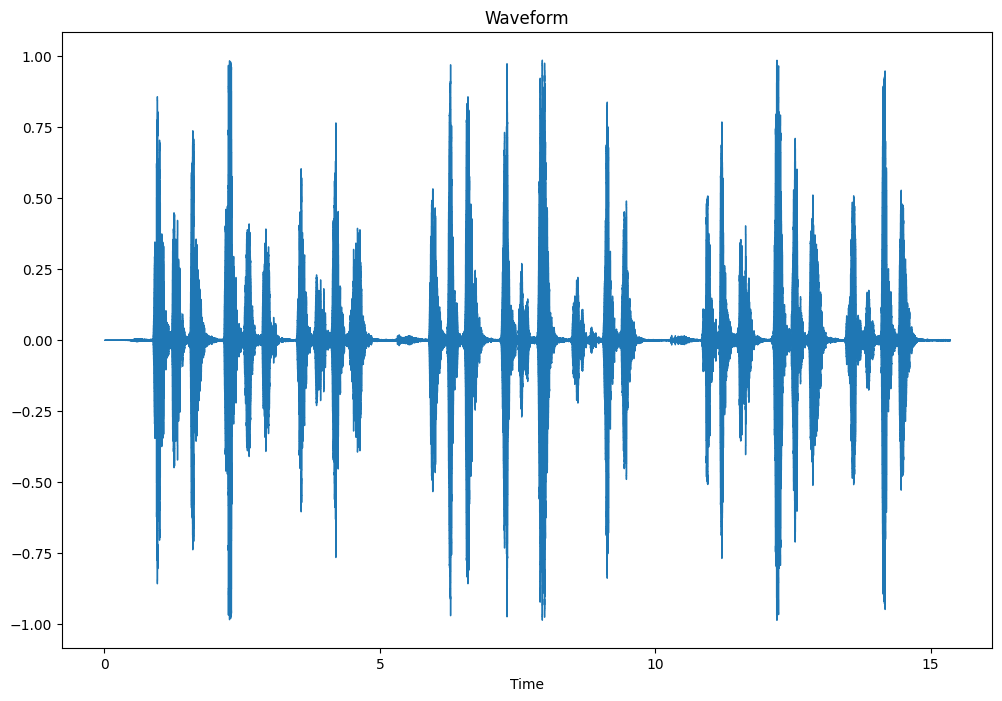

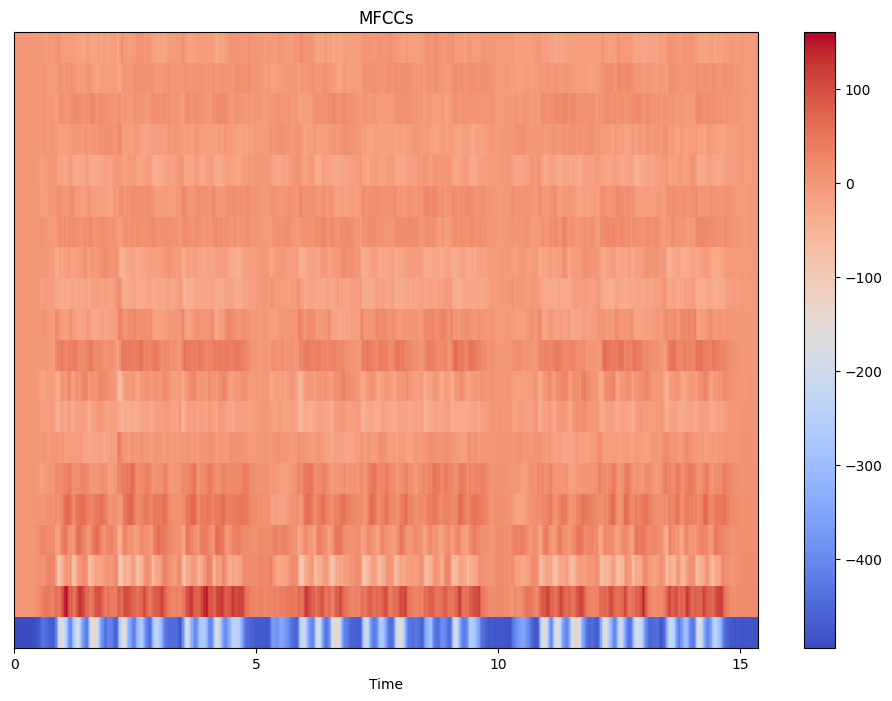

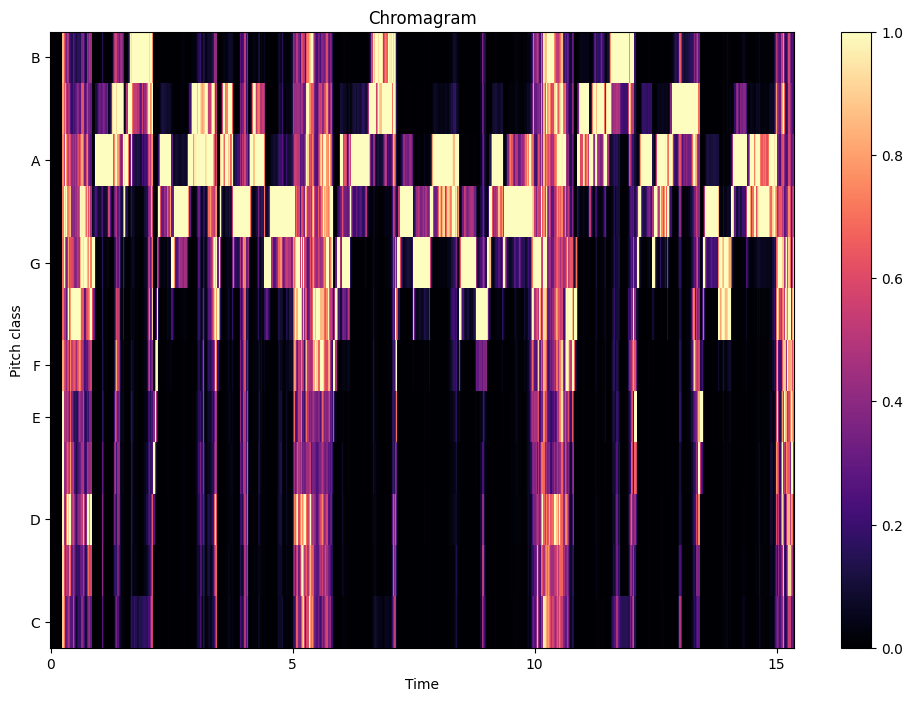

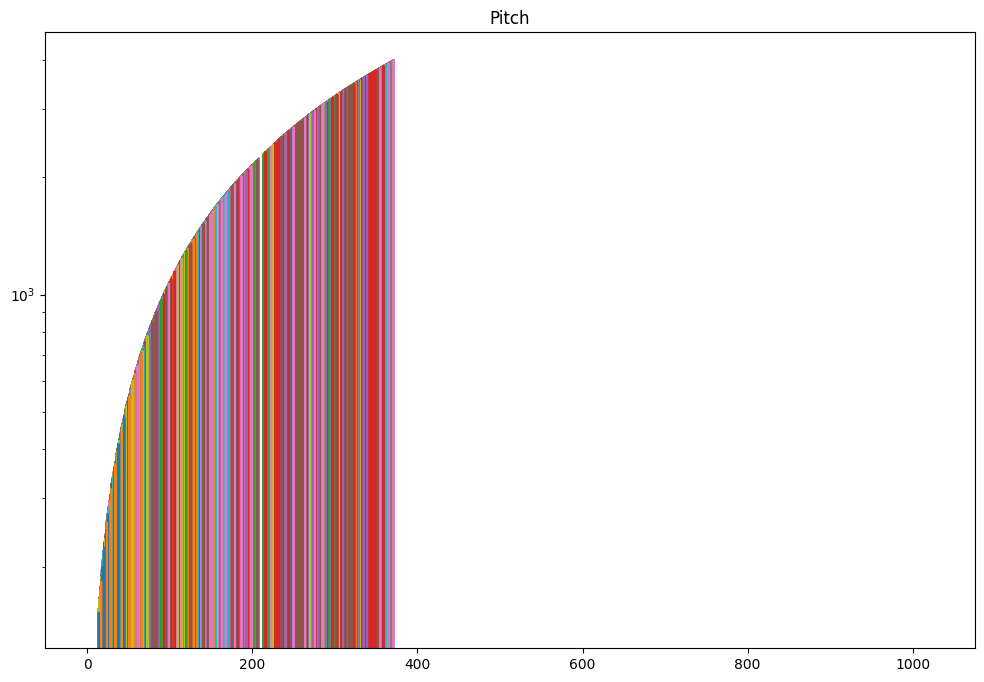

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_file = '/content/audio.wav'

# Load the audio file and obtain its waveform and sample rate
y, sr = librosa.load(audio_file)

# Display the waveform
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

# Compute and display the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCCs')
plt.colorbar()
plt.show()

# Calculate and plot the chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 8))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Chromagram')
plt.colorbar()
plt.show()

# Calculate and plot the pitch
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
plt.figure(figsize=(12, 8))
plt.semilogy(pitches)
plt.title('Pitch')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


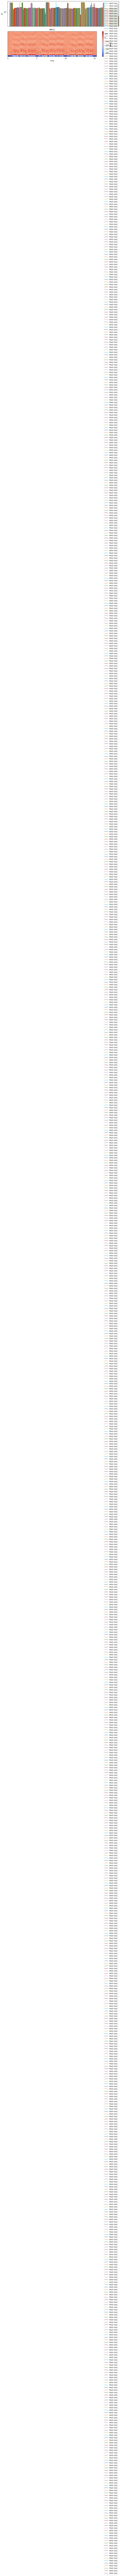

Pitch Mean: 21.806181
Pitch Standard Deviation: 225.0979
MFCCs Mean: [-360.08173      61.95948     -14.376961     16.52778      28.42128
   16.831501     -2.3523455   -15.167294     -0.43607843   23.757822
    0.38454014  -17.734684    -12.269591      9.006777      4.072823
  -13.919566     -4.9721785     5.365688      1.8054107    -6.0303183 ]
MFCCs Standard Deviation: [101.05209   32.54633   29.024683  18.17516   19.66802   15.479355
   9.615439  12.268886  14.988807  17.476233  13.334888  11.163398
  12.868359   8.448594   9.935264  10.658065   8.736322   8.805822
   8.506919   8.488509]


In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Audio Data
audio_file = '/content/audio.wav'
y, sr = librosa.load(audio_file, sr=None)  # Load audio and sample rate

# Preprocessing (e.g., resampling)
target_sr = 22050  # Target sample rate
y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

# Step 2: Extract Audio Features
pitch, magnitudes = librosa.piptrack(y=y, sr=target_sr)
mfccs = librosa.feature.mfcc(y=y, sr=target_sr)

# Step 3: Visualize Audio Features
plt.figure(figsize=(12, 6))

# Visualize pitch
plt.subplot(2, 1, 1)
plt.semilogy(pitch.T, label='Pitch (Hz)')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, pitch.shape[-1]])
plt.legend()

# Visualize MFCCs
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time', sr=target_sr)
plt.colorbar(label='MFCC')
plt.title('MFCC')

plt.show()

# Step 4: Statistical Analysis
# Calculate statistics of pitch and MFCCs
mean_pitch = np.mean(pitch)
std_pitch = np.std(pitch)
mean_mfccs = np.mean(mfccs, axis=1)
std_mfccs = np.std(mfccs, axis=1)

# Display statistics
print("Pitch Mean:", mean_pitch)
print("Pitch Standard Deviation:", std_pitch)
print("MFCCs Mean:", mean_mfccs)
print("MFCCs Standard Deviation:", std_mfccs)


In [8]:
pip install pydub


In [11]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7e1f61aff1a9de80b21c85372ecec5455eeb1c4a998cdab863cec8637e7c9a0b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [30]:
import os
from pydub import AudioSegment
import librosa
import numpy as np

# Function to check if audio is clear
def is_audio_clear(audio_path, snr_threshold=20):
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path)

        # Calculate the energy of the signal
        signal_energy = np.sum(y ** 2)

        # Calculate the energy of the noise (assuming the entire audio is noise)
        total_energy = np.sum(librosa.effects.preemphasis(y, coef=0.97) ** 2)

        # Calculate the SNR in dB
        snr = 10 * np.log10(signal_energy / total_energy)

        if snr >= snr_threshold:
            print("Audio is clear.")
            return True
        else:
            print("Audio has significant noise or distortion.")
            return False
    except Exception as e:
        print(f"Error: {e}")
        return False

# Function to preprocess audio
def preprocess_audio(input_audio_path, output_directory, duration=10, output_format="wav"):
    try:
        # Load the audio file using pydub
        audio = AudioSegment.from_file(input_audio_path)

        # Normalize the volume
        audio = audio.normalize()

        # Segment the audio into shorter clips of the specified duration (in milliseconds)
        segment_length = duration * 1000
        segments = [audio[i:i+segment_length] for i in range(0, len(audio), segment_length)]

        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        for i, segment in enumerate(segments):
            # Save the segments in a consistent format
            output_file = os.path.join(output_directory, f"segment_{i + 1}.{output_format}")
            segment.export(output_file, format=output_format)
            print(f"Segment {i + 1} saved as {output_file}")

        print("Audio preprocessing complete.")
        return segments  # Return the segments for potential cleaning
    except Exception as e:
        print(f"Error: {e}")
        return []

# Define the path to your specific audio file
audio_path = "/content/audio 3.mp3"

# Data Validation: Check if the audio is clear
if is_audio_clear(audio_path, snr_threshold=20):
    # Data Cleaning: Preprocess the audio data
    output_directory = 'path/to/preprocessed/audio'  # Update with your output directory
    os.makedirs(output_directory, exist_ok=True)

    segment_duration = 10  # Adjust as needed
    segments = preprocess_audio(audio_path, output_directory, duration=segment_duration, output_format='wav')

    if segments:
        print("Audio preprocessing complete.")
    else:
        print("No audio segments to clean.")
else:
    # If audio has significant noise or distortion, clean it and save the cleaned version
    print("Audio has significant noise or distortion. Cleaning and saving the cleaned audio...")

    # Create an empty audio segment for cleaned audio
    cleaned_audio = AudioSegment.silent(duration=0)


Audio has significant noise or distortion.
Audio has significant noise or distortion. Cleaning and saving the cleaned audio...
